<ipython-input-4-cfd9e4393cd5>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(df["Month"].max(), periods=future_periods+1, freq='M')[1:]


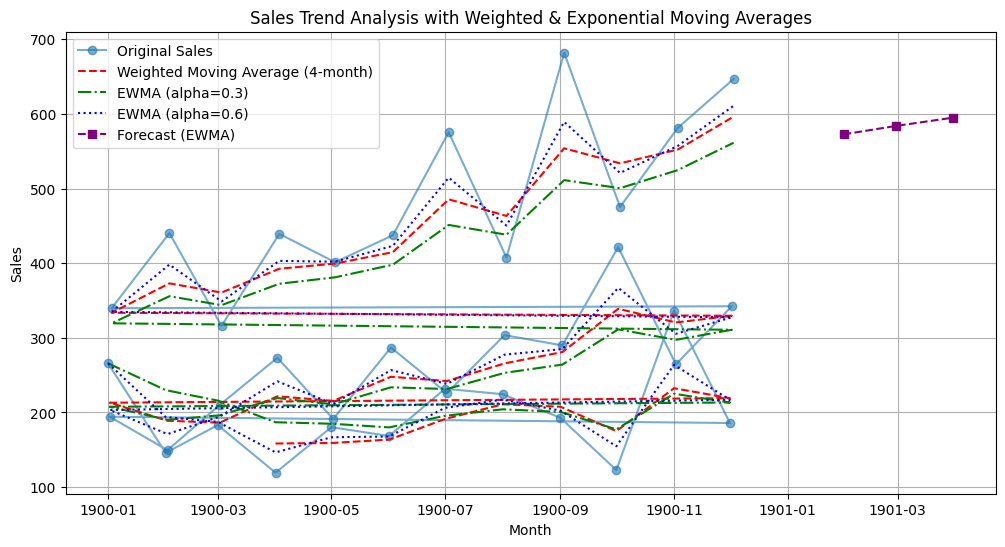

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/sales-of-shampoo-over-a-three-ye (1).csv")
df.columns = ["Month", "Sales"]
df["Month"] = pd.to_datetime(df["Month"], format="%d-%b", errors="coerce")

# Weighted Moving Average (WMA)
weights = np.array([0.1, 0.2, 0.3, 0.4])  # More weight to recent values
df["WMA_4"] = df["Sales"].rolling(window=4).apply(lambda x: np.dot(x, weights), raw=True)

# Exponential Weighted Moving Average (EWMA)
df["EWMA_0.3"] = df["Sales"].ewm(alpha=0.3, adjust=False).mean()
df["EWMA_0.6"] = df["Sales"].ewm(alpha=0.6, adjust=False).mean()

# Forecasting using EWMA (next 3 months)
future_periods = 3
last_ewma_value = df["EWMA_0.3"].iloc[-1]
forecast_values = [last_ewma_value * (1 + 0.02 * i) for i in range(1, future_periods + 1)]
forecast_months = pd.date_range(df["Month"].max(), periods=future_periods+1, freq='M')[1:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df["Month"], df["Sales"], label="Original Sales", marker='o', linestyle='-', alpha=0.6)
plt.plot(df["Month"], df["WMA_4"], label="Weighted Moving Average (4-month)", linestyle='--', color='red')
plt.plot(df["Month"], df["EWMA_0.3"], label="EWMA (alpha=0.3)", linestyle='-.', color='green')
plt.plot(df["Month"], df["EWMA_0.6"], label="EWMA (alpha=0.6)", linestyle='dotted', color='blue')

# Forecasting Line
plt.plot(forecast_months, forecast_values, label="Forecast (EWMA)", marker='s', linestyle='dashed', color='purple')

# Labels and Legend
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Trend Analysis with Weighted & Exponential Moving Averages")
plt.legend()
plt.grid(True)
plt.show()
